In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import os

In [2]:
file_path="C:\\Users\\bijoy\\OneDrive\\Desktop\\Logistic regression\\AReM"

In [3]:
folders = [i for i in os.listdir(file_path) if os.path.isdir(file_path+"\\"+i)]
dataframe = pd.DataFrame()
for folder in folders:
    df = pd.DataFrame()
    for file in os.listdir(file_path+"\\"+folder):
        data = pd.read_csv(file_path+"\\"+folder+"\\"+file, skiprows=[0,1,2,3], error_bad_lines=False)
        df = pd.concat([df,data])
    df['label'] = folder
    dataframe = pd.concat([dataframe, df])

b'Skipping line 485: expected 7 fields, saw 8\n'
b'Skipping line 485: expected 7 fields, saw 8\n'


In [4]:
dataframe.head()

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,0,39.25,0.43,22.75,0.43,33.75,1.3,bending1
1,250,39.25,0.43,23.00,0.00,33.00,0.0,bending1
2,500,39.25,0.43,23.25,0.43,33.00,0.0,bending1
3,750,39.50,0.50,23.00,0.71,33.00,0.0,bending1
4,1000,39.50,0.50,24.00,0.00,33.00,0.0,bending1


In [45]:
dataframe.describe()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
count,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000
mean,39.021258,1.472967,14.348149,1.513225,16.010977,1.631255
std,6.297586,2.055456,5.414405,1.644267,6.768380,1.642690
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.250000,0.430000,11.500000,0.430000,12.000000,0.470000
50%,40.000000,0.500000,15.000000,0.830000,15.750000,1.000000
75%,44.000000,1.870000,18.000000,2.350000,19.250000,2.360000
max,56.250000,17.240000,35.000000,11.420000,40.330000,13.610000


In [46]:
dataframe.dtypes

# Columns: time     object
avg_rss12          float64
var_rss12          float64
avg_rss13          float64
var_rss13          float64
avg_rss23          float64
var_rss23          float64
label               object
dtype: object

In [47]:
dataframe.isnull().sum()

# Columns: time      0
avg_rss12          480
var_rss12          480
avg_rss13          480
var_rss13          480
avg_rss23          480
var_rss23          480
label                0
dtype: int64

## Imputing missing values

In [5]:
columns = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
for i in columns:
    dataframe[i] = dataframe[i].replace(np.nan, dataframe[i].mean())

In [5]:
dataframe.isnull().sum()

# Columns: time    0
avg_rss12          0
var_rss12          0
avg_rss13          0
var_rss13          0
avg_rss23          0
var_rss23          0
label              0
dtype: int64

In [6]:
dataframe.drop(['# Columns: time'], axis=1, inplace=True)

# Encode output label

In [7]:
encoder = LabelEncoder()
dataframe[['label']] = encoder.fit_transform(dataframe['label'])

In [8]:
dataframe

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,39.25,0.43,22.75,0.43,33.75,1.30,0
1,39.25,0.43,23.00,0.00,33.00,0.00,0
2,39.25,0.43,23.25,0.43,33.00,0.00,0
3,39.50,0.50,23.00,0.71,33.00,0.00,0
4,39.50,0.50,24.00,0.00,33.00,0.00,0
...,...,...,...,...,...,...,...
475,31.50,1.66,12.50,3.20,14.25,4.44,6
476,27.33,1.25,11.33,0.94,20.00,4.00,6
477,37.80,7.68,14.20,2.48,17.25,0.83,6
478,33.75,1.30,15.75,5.21,16.50,2.69,6


# Experiment 1
- taking all the features

# Remove outliers

<AxesSubplot:>

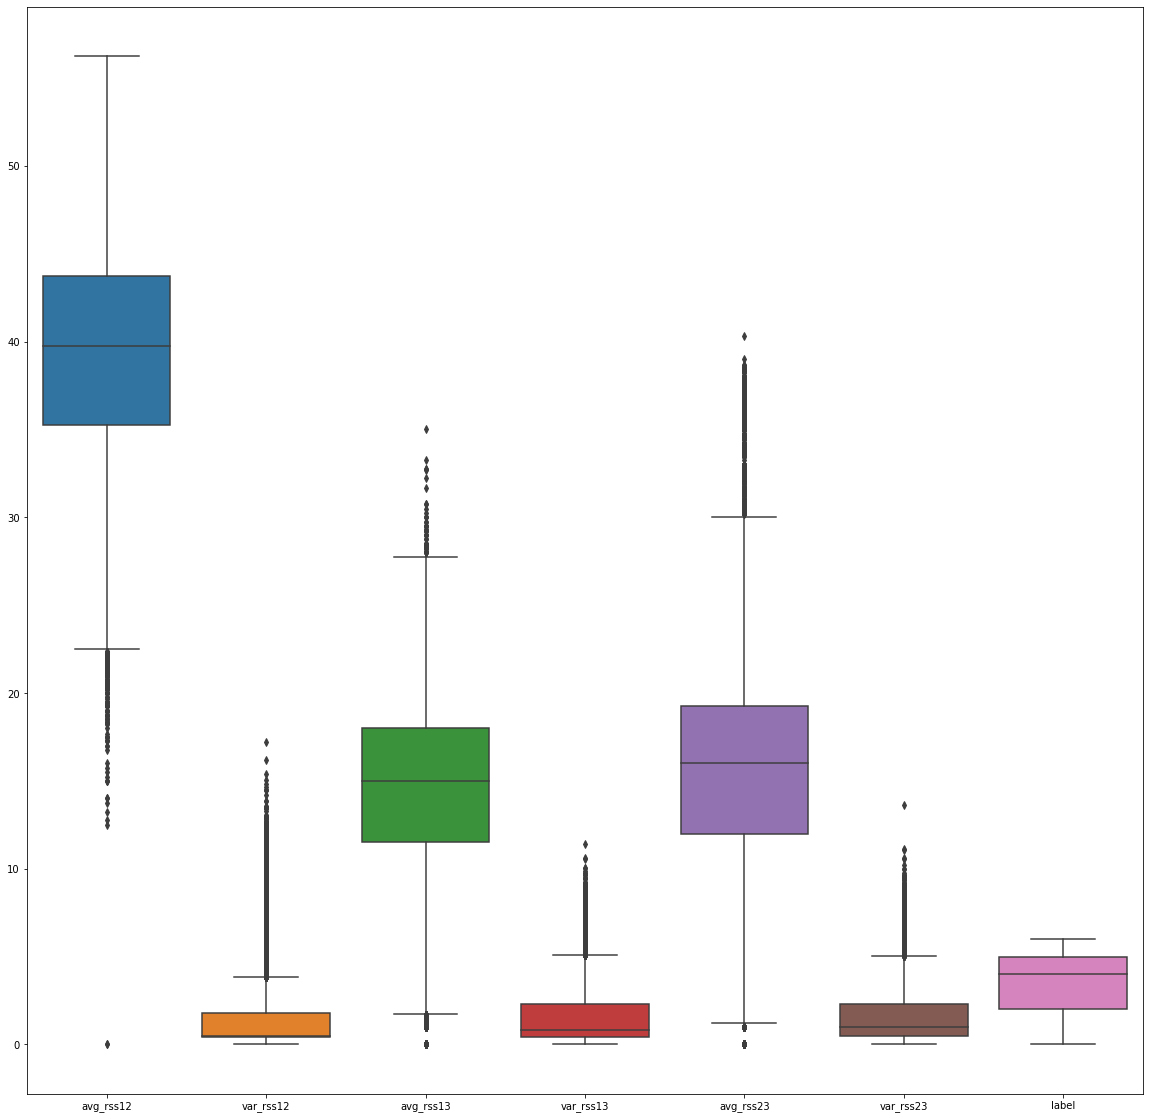

In [52]:
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=dataframe, ax=ax)

In [62]:
q = dataframe['var_rss12'].quantile(.95)
df_new = dataframe[dataframe['var_rss12'] < q]

<AxesSubplot:>

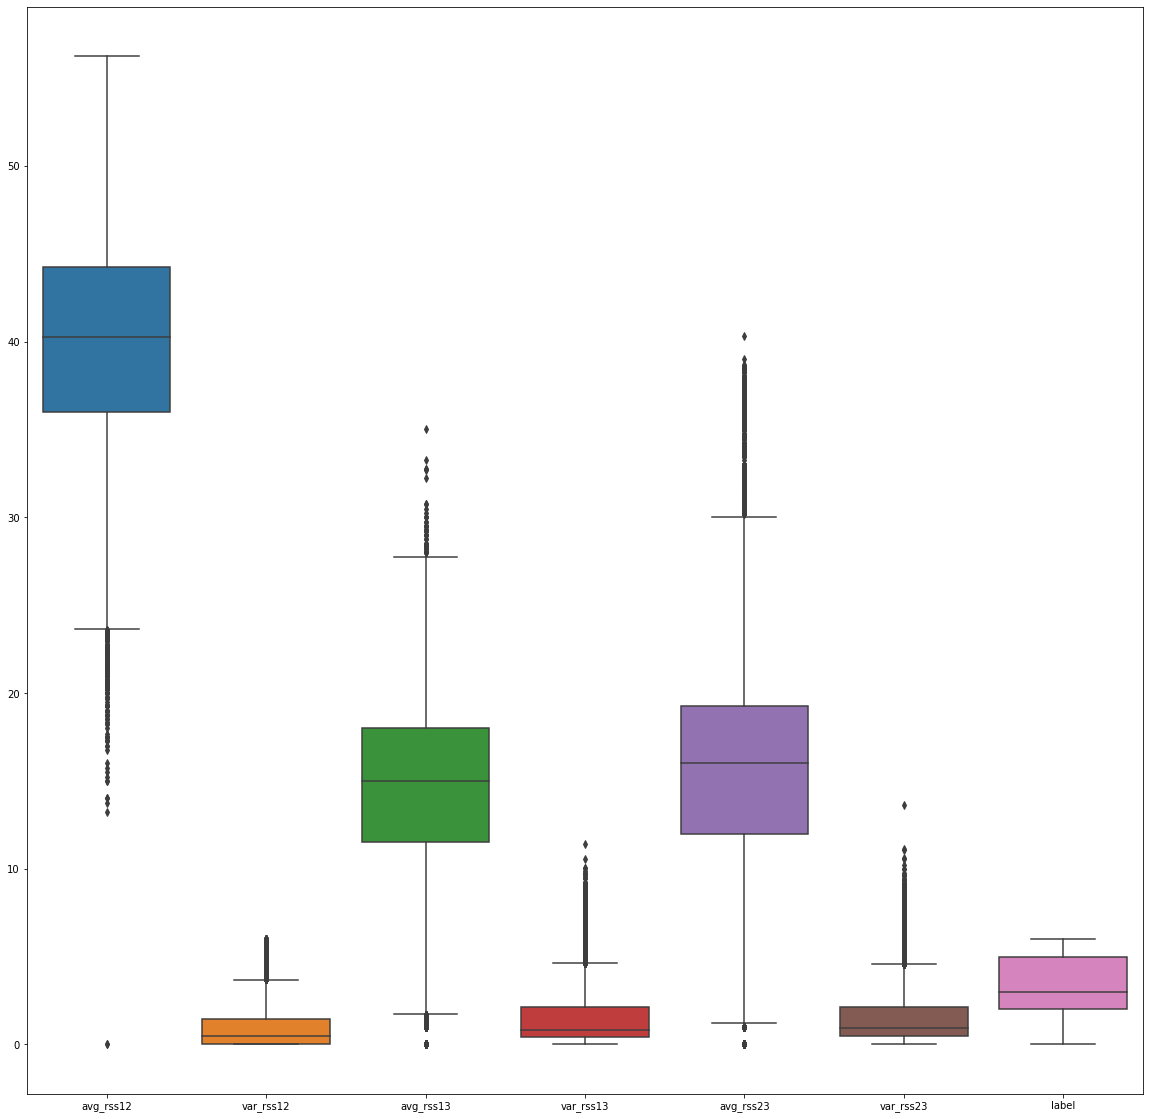

In [63]:
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=df_new, ax=ax)

In [64]:
df_new

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,39.25,0.43,22.75,0.43,33.75,1.30,0
1,39.25,0.43,23.00,0.00,33.00,0.00,0
2,39.25,0.43,23.25,0.43,33.00,0.00,0
3,39.50,0.50,23.00,0.71,33.00,0.00,0
4,39.50,0.50,24.00,0.00,33.00,0.00,0
...,...,...,...,...,...,...,...
473,36.00,2.45,14.75,4.55,14.67,3.40,6
475,31.50,1.66,12.50,3.20,14.25,4.44,6
476,27.33,1.25,11.33,0.94,20.00,4.00,6
478,33.75,1.30,15.75,5.21,16.50,2.69,6


In [65]:
q = df_new['avg_rss23'].quantile(.95)
df_new = df_new[df_new['avg_rss23'] < q]

<AxesSubplot:>

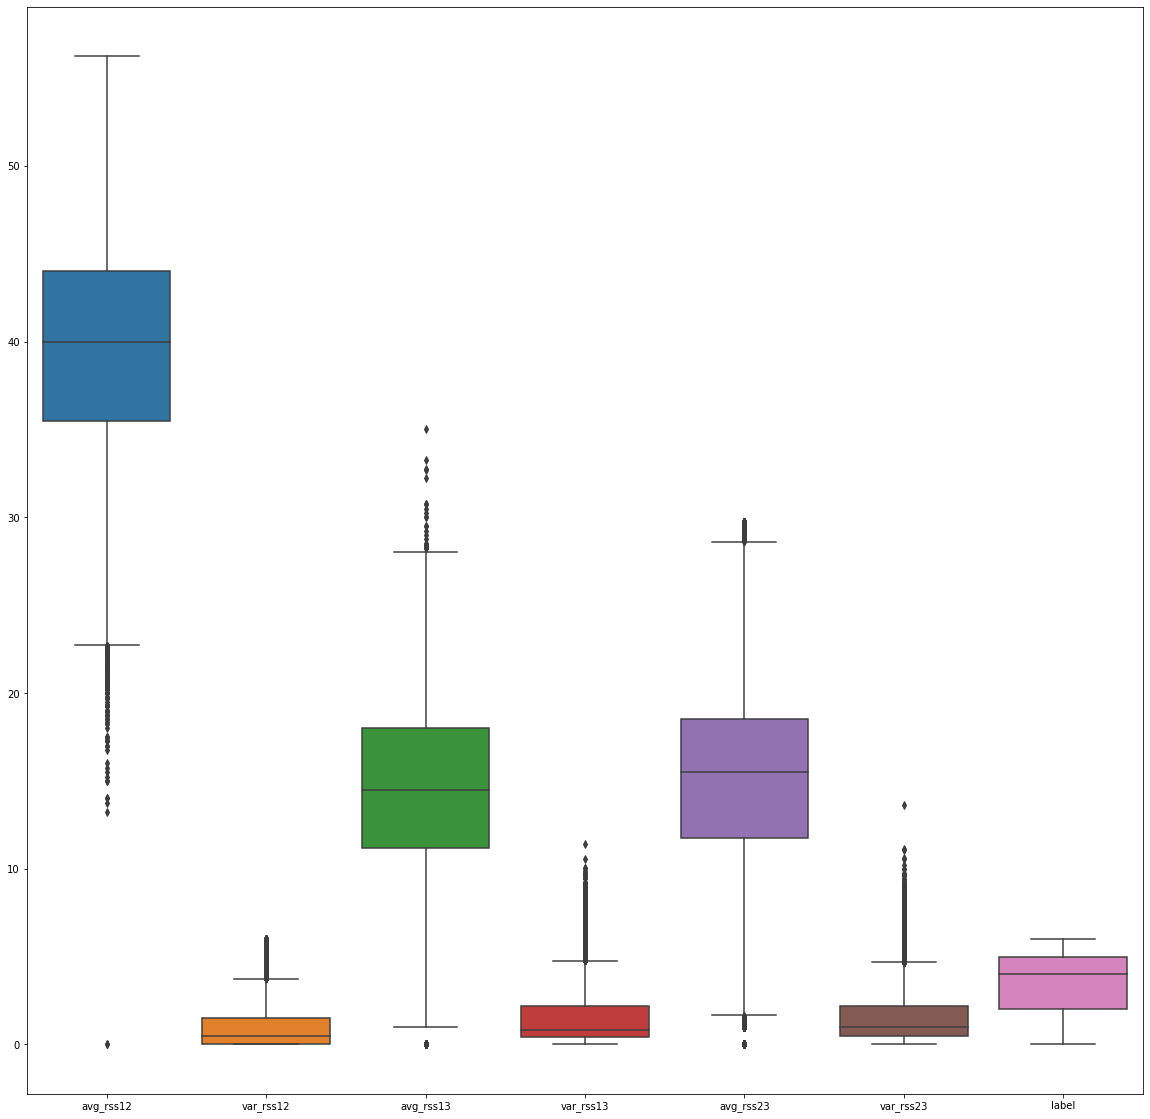

In [66]:
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=df_new, ax=ax)

In [67]:
q = df_new['var_rss23'].quantile(.98)
df_new = df_new[df_new['var_rss23'] < q]

<AxesSubplot:>

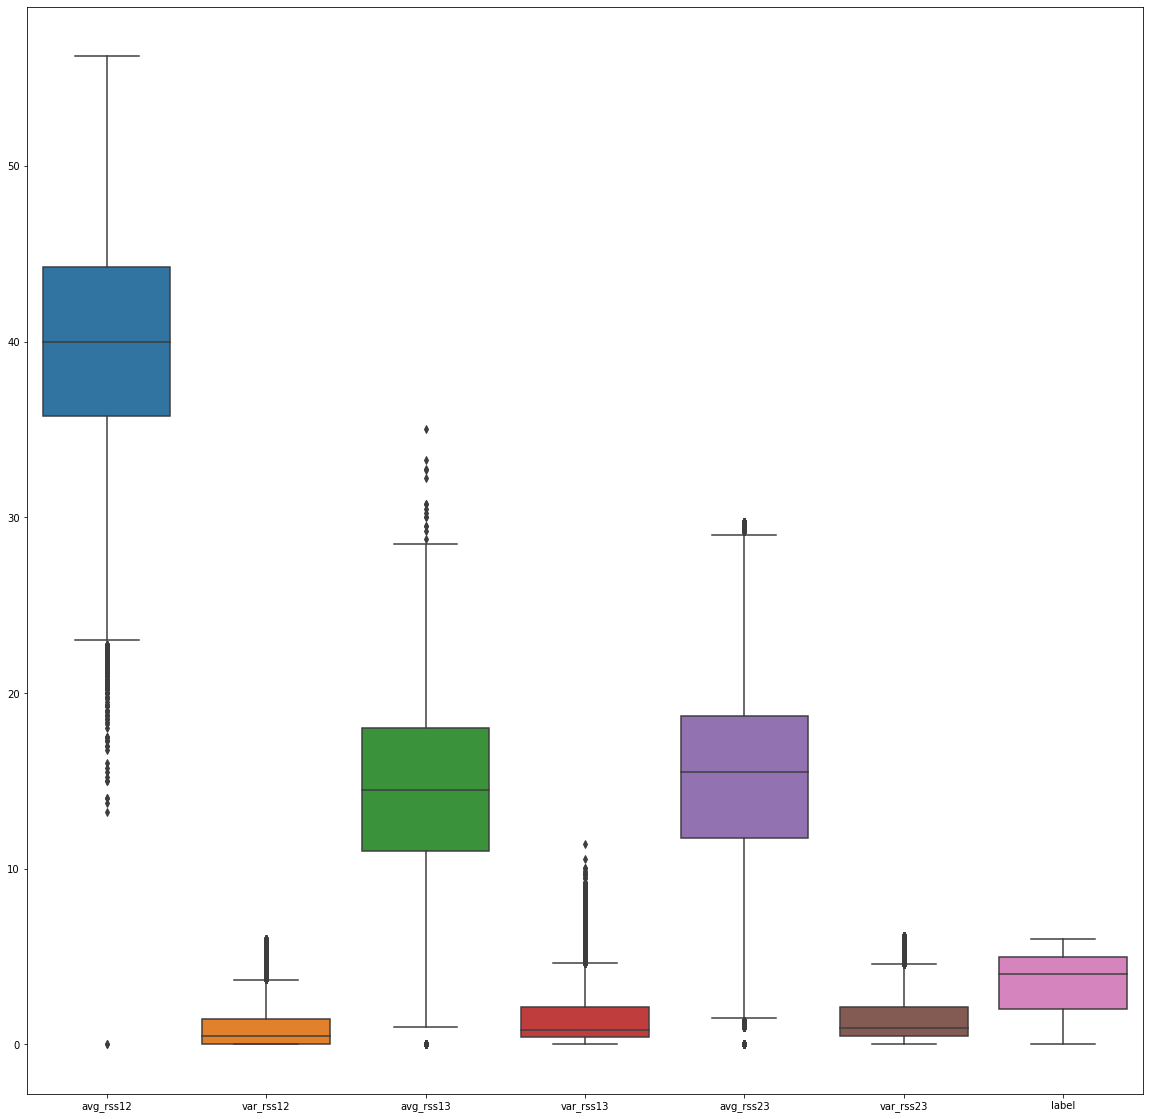

In [68]:
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=df_new, ax=ax)

In [69]:
q = df_new['avg_rss12'].quantile(.02)
df_new = df_new[df_new['avg_rss12'] > q]

<AxesSubplot:>

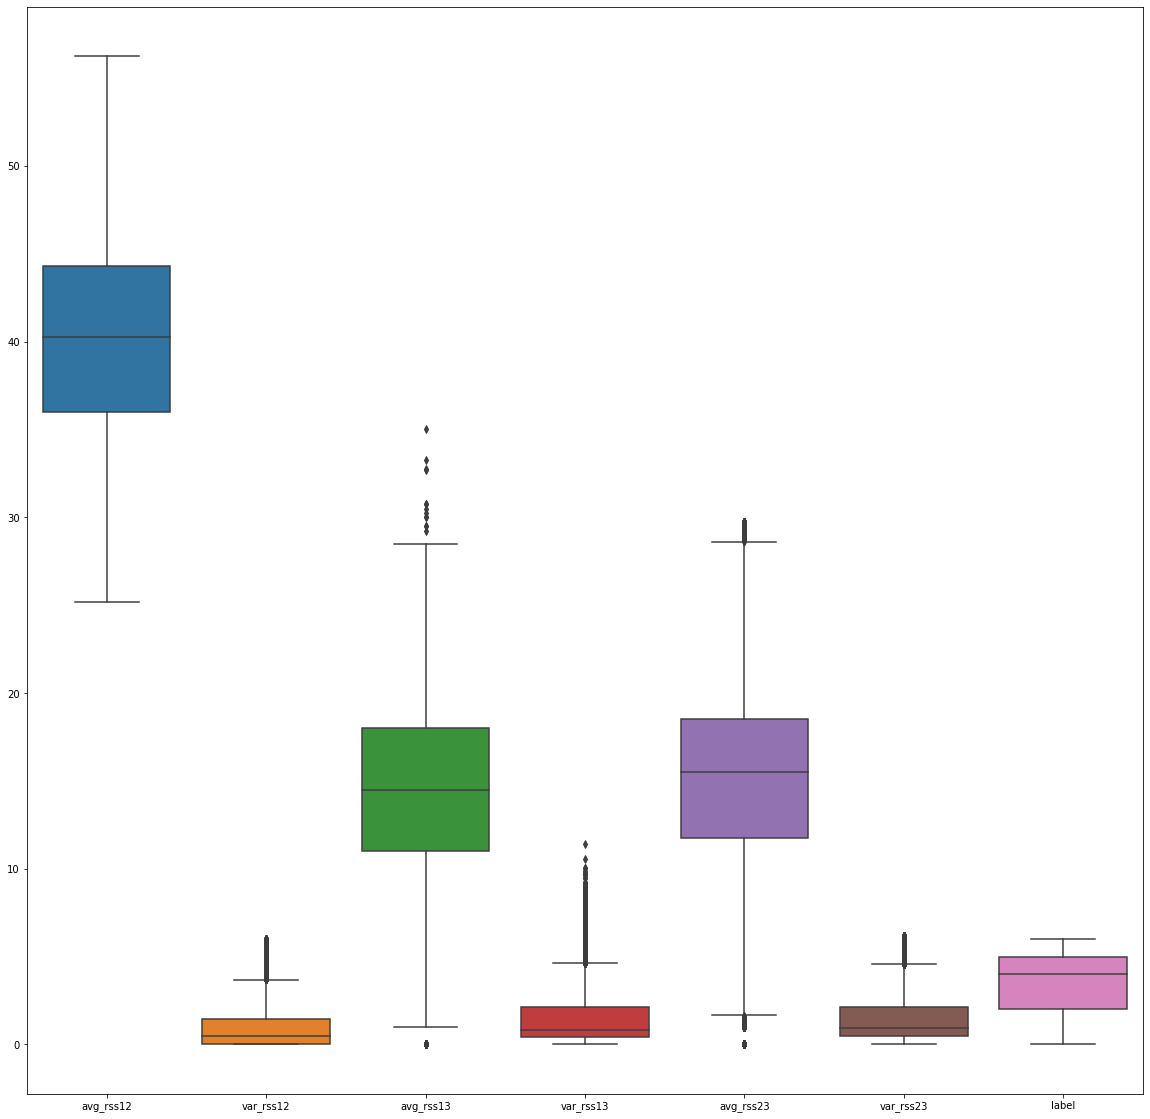

In [70]:
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=df_new, ax=ax)

In [72]:
q = df_new['var_rss13'].quantile(.99)
df_new = df_new[df_new['var_rss13'] < q]

<AxesSubplot:>

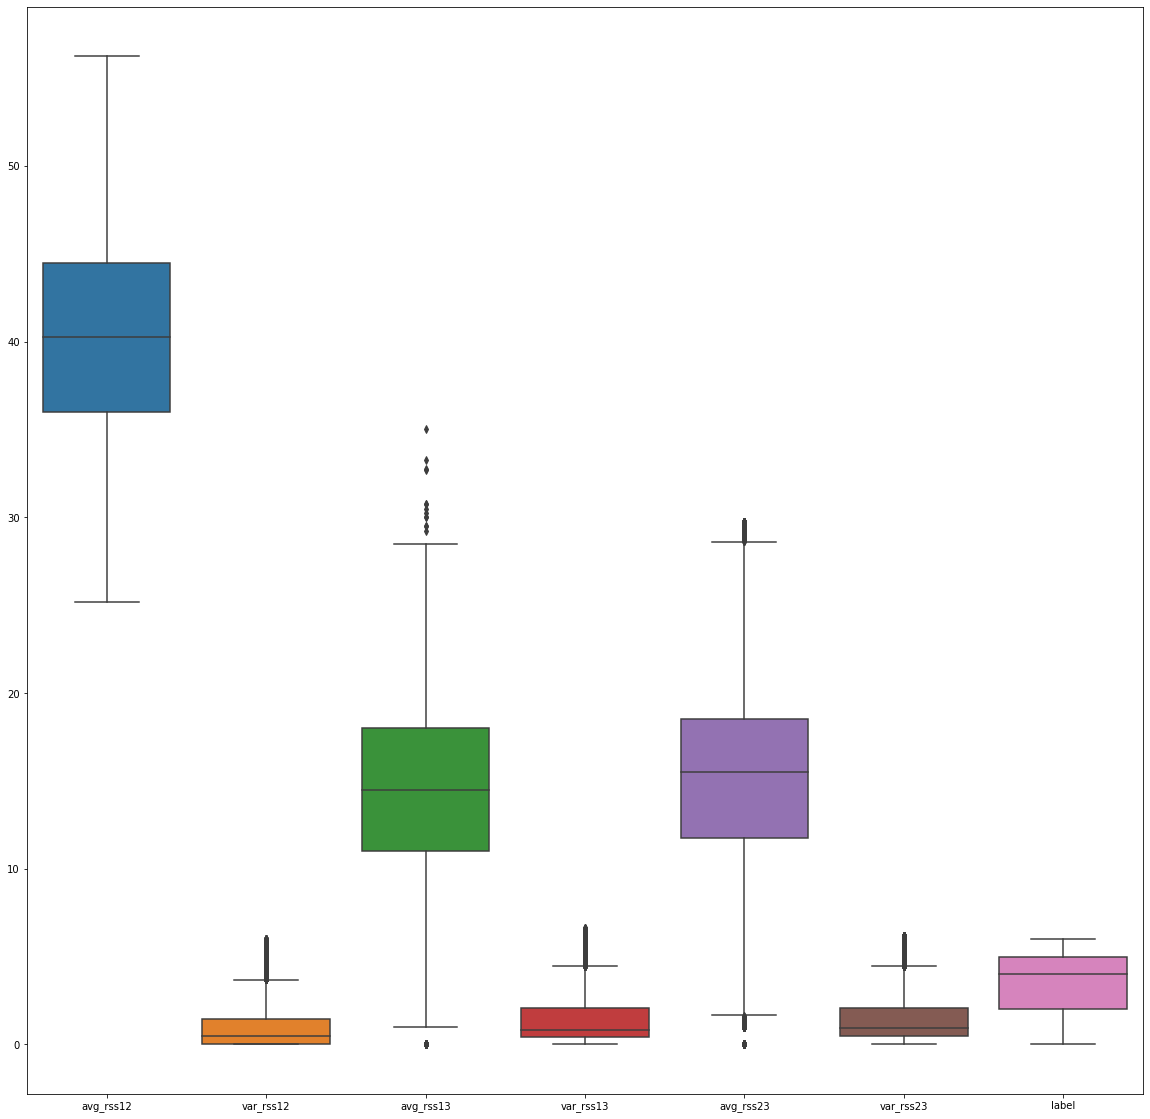

In [73]:
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=df_new, ax=ax)

In [74]:
df_new

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
406,42.75,1.30,23.75,1.48,29.75,0.43,0
407,42.00,0.00,21.67,0.47,29.67,0.47,0
409,42.00,0.00,24.00,0.00,29.75,0.43,0
410,42.00,0.00,22.50,0.50,29.75,0.43,0
412,42.00,0.00,22.50,1.12,29.75,0.43,0
...,...,...,...,...,...,...,...
473,36.00,2.45,14.75,4.55,14.67,3.40,6
475,31.50,1.66,12.50,3.20,14.25,4.44,6
476,27.33,1.25,11.33,0.94,20.00,4.00,6
478,33.75,1.30,15.75,5.21,16.50,2.69,6


In [75]:
columns = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
scaler = StandardScaler()
df_new[columns] = pd.DataFrame(scaler.fit_transform(df_new[columns]), columns=columns)

C:\Users\bijoy\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [76]:
df_new

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
406,0.916502,-0.791865,0.696764,0.293482,1.671857,0.293183,0
407,0.916502,-0.791865,1.214318,-0.364942,1.260090,-0.462827,0
409,0.916502,-0.791865,0.932016,-0.636456,1.763361,-0.702715,0
410,0.916502,-0.791865,0.852972,-0.609305,1.611465,-0.724523,0
412,0.916502,-0.791865,0.932016,-0.364942,1.305842,-0.041206,0
...,...,...,...,...,...,...,...
473,0.959145,-0.489123,1.120218,-0.045912,1.534601,-0.462827,6
475,0.575359,-0.291988,1.778923,-0.045912,1.168586,-0.753601,6
476,0.618002,-0.207502,1.229374,-0.290275,1.245450,-0.382865,6
478,0.745930,-0.291988,-0.338344,-0.446396,1.305842,-0.179323,6


In [77]:
x = df_new.drop(['label'], axis=1)
y = df_new['label']

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Using saga solver

In [99]:
logistic = LogisticRegression(solver='saga')
logistic.fit(x_train, y_train)

LogisticRegression(solver='saga')

In [100]:
y_pred = logistic.predict(x_test)

In [101]:
y_pred

array([5, 5, 5, ..., 4, 3, 4])

In [102]:
y_test

340    6
156    4
477    6
460    2
78     2
      ..
93     6
390    6
446    5
429    3
474    5
Name: label, Length: 10796, dtype: int32

In [103]:
confusion_matrix(y_test, y_pred)

array([[  0,   0,   0,  99,  85, 183,   0],
       [  0,   0,   0, 201, 176, 307,   0],
       [  0,   0,   0, 535, 479, 863,   0],
       [  0,   0,   0, 586, 561, 956,   0],
       [  0,   0,   0, 608, 537, 984,   0],
       [  0,   0,   0, 635, 558, 947,   0],
       [  0,   0,   0, 421, 397, 678,   0]], dtype=int64)

In [104]:
accuracy_score(y_test, y_pred)

0.19173768062245275

In [116]:
roc_auc_score(y_test, logistic.predict_proba(x_test), multi_class='ovr')

0.5000656125633751

# Using sag solver

In [105]:
logistic_sag = LogisticRegression(solver='sag')
logistic_sag.fit(x_train, y_train)

LogisticRegression(solver='sag')

In [106]:
y_pred = logistic_sag.predict(x_test)

In [107]:
confusion_matrix(y_test, y_pred)

array([[  0,   0,   0,  99,  85, 183,   0],
       [  0,   0,   0, 201, 176, 307,   0],
       [  0,   0,   0, 535, 479, 863,   0],
       [  0,   0,   0, 586, 561, 956,   0],
       [  0,   0,   0, 608, 537, 984,   0],
       [  0,   0,   0, 635, 558, 947,   0],
       [  0,   0,   0, 421, 397, 678,   0]], dtype=int64)

In [108]:
accuracy_score(y_test, y_pred)

0.19173768062245275

In [117]:
roc_auc_score(y_test, logistic_sag.predict_proba(x_test), multi_class='ovr')

0.5000639816921091

# Experiment 2
- taking only the original values are discarding the averages

In [8]:
drop = ['avg_rss12', 'avg_rss13', 'avg_rss23']
dataframe.drop(drop, axis=1, inplace=True)

In [9]:
dataframe

,var_rss12,var_rss13,var_rss23,label
0,0.43,0.43,1.30,0
1,0.43,0.00,0.00,0
2,0.43,0.43,0.00,0
3,0.50,0.71,0.00,0
4,0.50,0.00,0.00,0
...,...,...,...,...
475,1.66,3.20,4.44,6
476,1.25,0.94,4.00,6
477,7.68,2.48,0.83,6
478,1.30,5.21,2.69,6


<AxesSubplot:>

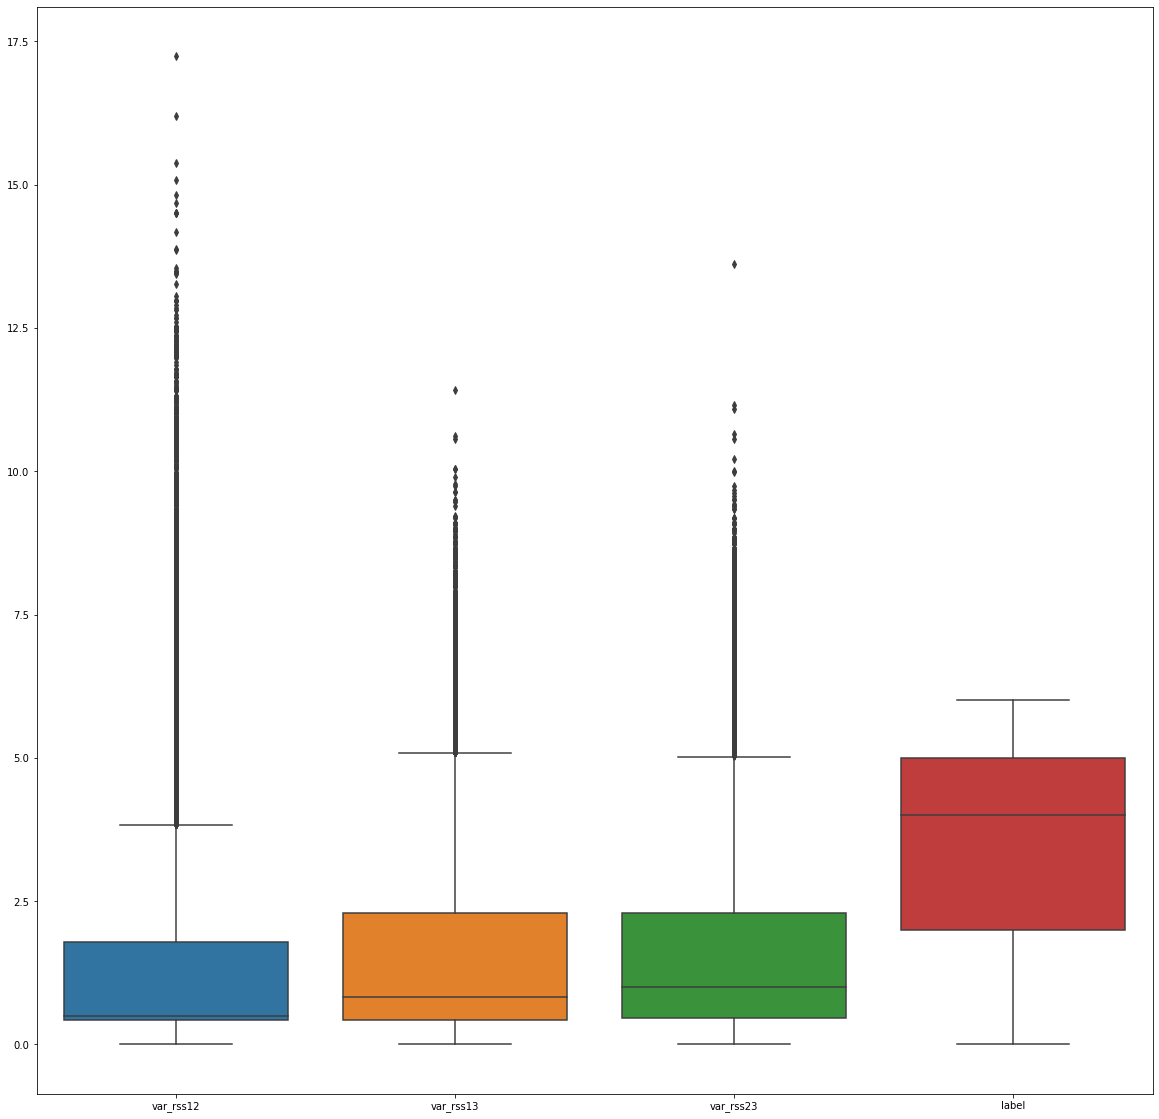

In [10]:
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=dataframe, ax=ax)

In [11]:
q = dataframe['var_rss12'].quantile(.95)
df_new = dataframe[dataframe['var_rss12'] < q]

<AxesSubplot:>

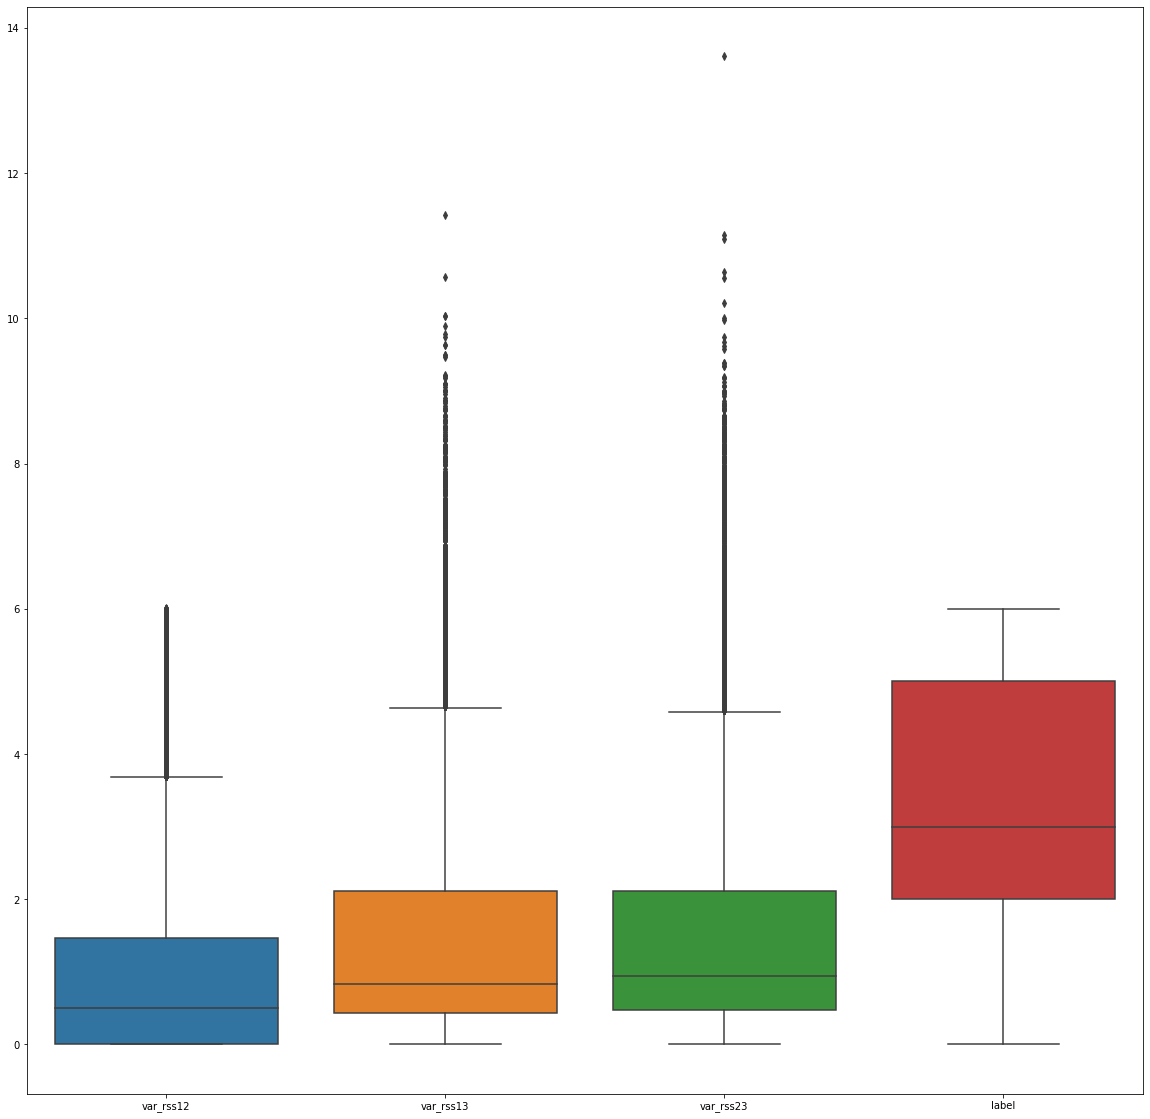

In [12]:
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=df_new, ax=ax)

In [13]:
q = df_new['var_rss23'].quantile(.98)
df_new = df_new[df_new['var_rss23'] < q]

<AxesSubplot:>

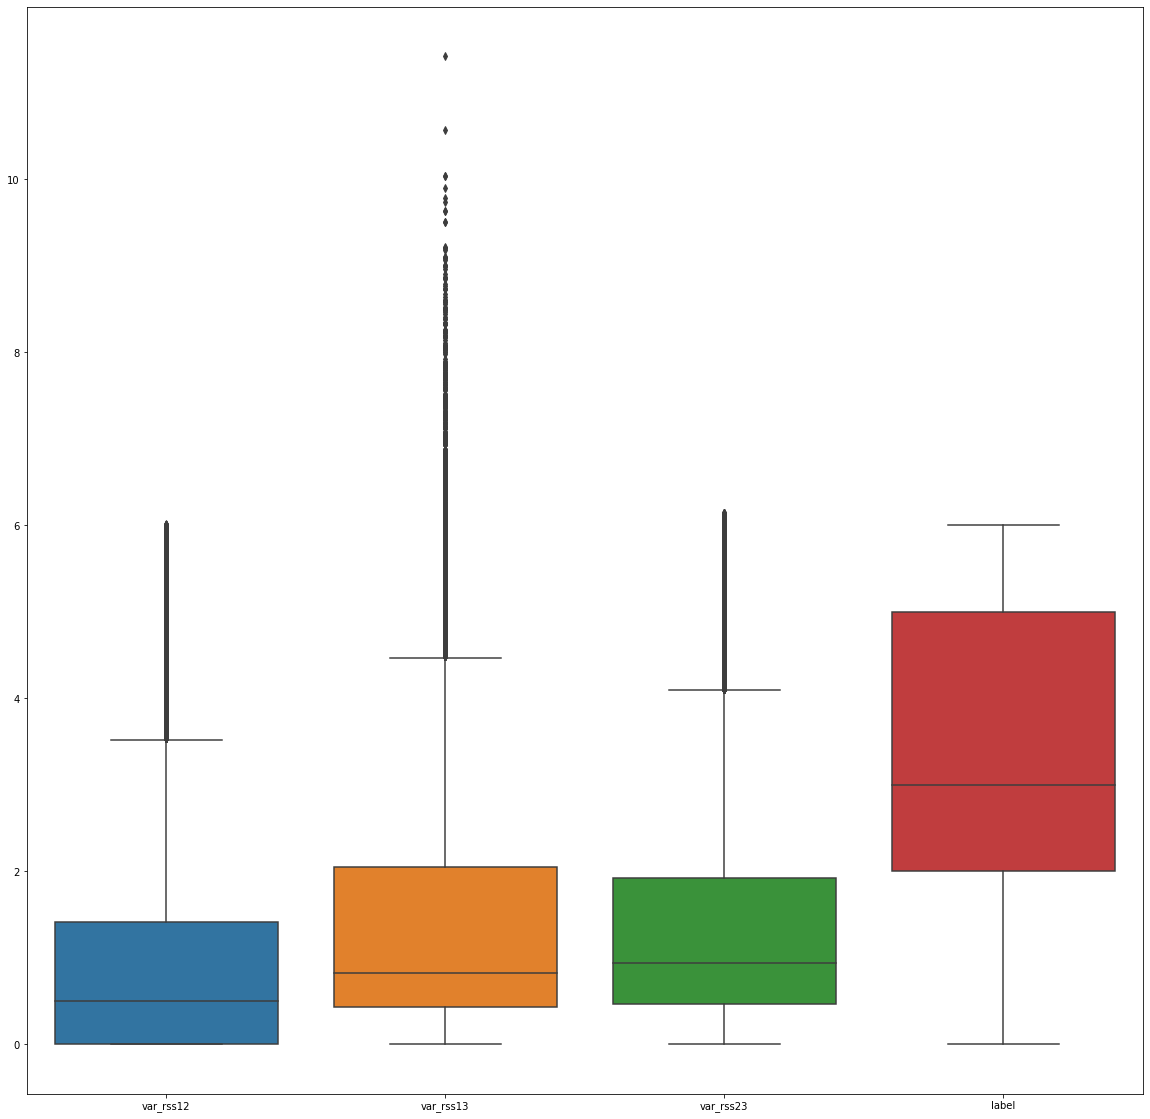

In [14]:
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=df_new, ax=ax)

In [28]:
q = df_new['var_rss13'].quantile(.98)
df_new = df_new[df_new['var_rss13'] < q]

<AxesSubplot:>

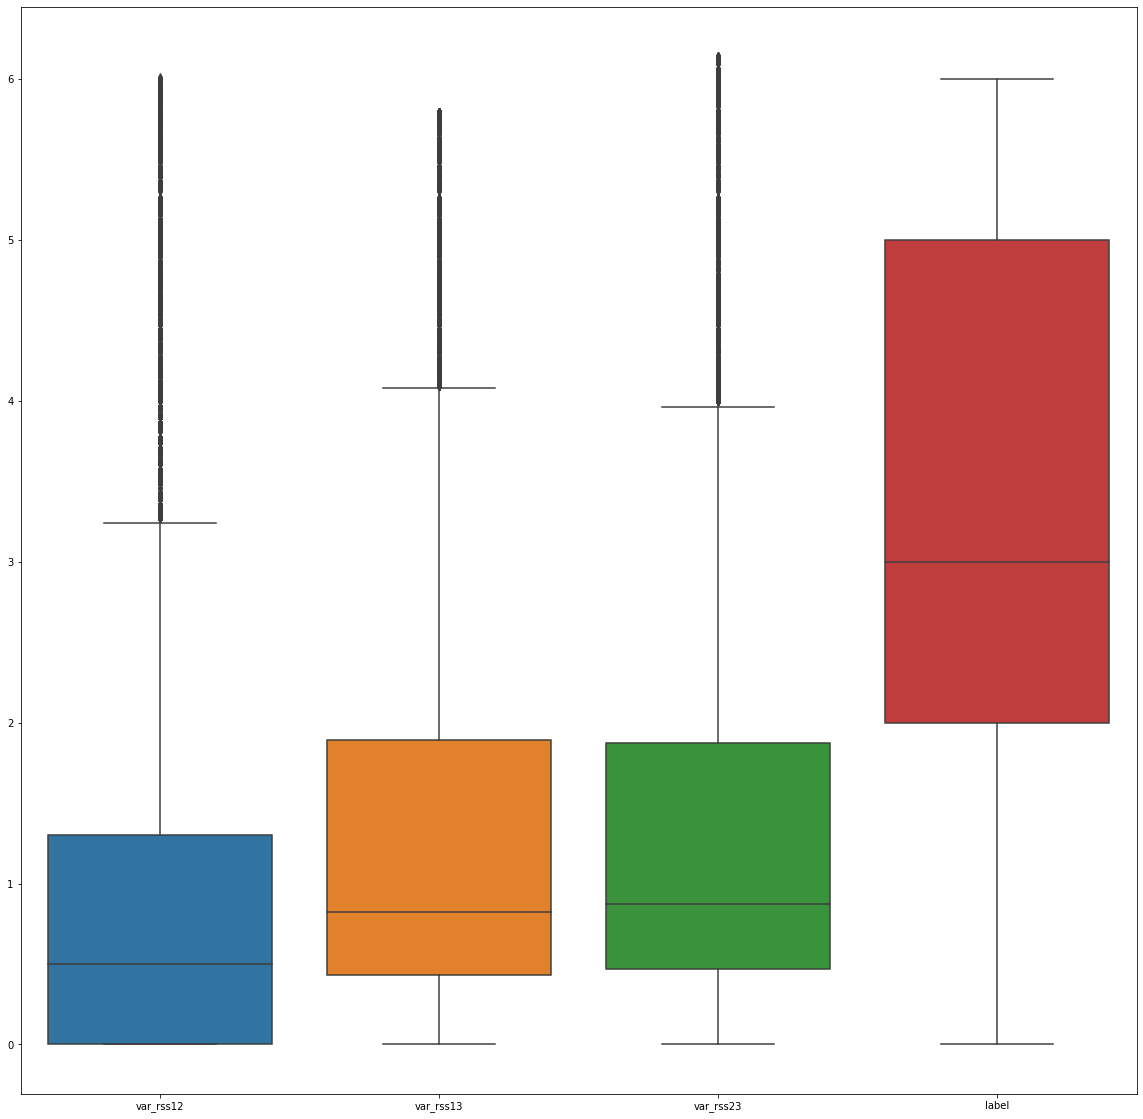

In [29]:
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=df_new, ax=ax)

In [31]:
df_new

,var_rss12,var_rss13,var_rss23,label
0,0.43,0.43,1.30,0
1,0.43,0.00,0.00,0
2,0.43,0.43,0.00,0
3,0.50,0.71,0.00,0
4,0.50,0.00,0.00,0
...,...,...,...,...
473,2.45,4.55,3.40,6
475,1.66,3.20,4.44,6
476,1.25,0.94,4.00,6
478,1.30,5.21,2.69,6


In [32]:
x = df_new.drop(['label'], axis=1)
y = df_new['label']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [34]:
logistic = LogisticRegression(solver='saga')
logistic.fit(x_train, y_train)

LogisticRegression(solver='saga')

In [35]:
y_pred = logistic.predict(x_test)

In [36]:
confusion_matrix(y_test, y_pred)

array([[  49,    0,   34,  592,  155,  187,    0],
       [  12,    3,  209,  283,  145,  212,    2],
       [  25,   10, 1107,    7,   86,   63,  477],
       [  27,    1,   35, 1297,  297,  498,    2],
       [  32,    1,  103,  926,  456,  605,    2],
       [  11,    3,   88,  919,  339,  791,    2],
       [   6,    1,  692,    0,   18,   12,  717]], dtype=int64)

In [37]:
accuracy_score(y_test, y_pred)

0.38304879105641737

In [38]:
roc_auc_score(y_test, logistic.predict_proba(x_test), multi_class='ovr')

0.7732965478880961

In [39]:
logistic_sag = LogisticRegression(solver='sag')
logistic_sag.fit(x_train, y_train)

LogisticRegression(solver='sag')

In [40]:
y_pred = logistic_sag.predict(x_test)

In [41]:
confusion_matrix(y_test, y_pred)

array([[  49,    0,   34,  592,  155,  187,    0],
       [  12,    3,  209,  283,  145,  212,    2],
       [  25,   10, 1107,    7,   86,   63,  477],
       [  27,    1,   35, 1297,  297,  498,    2],
       [  32,    1,  103,  926,  456,  605,    2],
       [  11,    3,   88,  919,  339,  791,    2],
       [   6,    1,  693,    0,   18,   12,  716]], dtype=int64)

In [42]:
accuracy_score(y_test, y_pred)

0.3829621284340064

In [43]:
roc_auc_score(y_test, logistic_sag.predict_proba(x_test), multi_class='ovr')

0.7732980782766641